The NFL is a multi-billion-dollar business. There are millions of fans around the world, possibly even yourself, that invest a significant amount of time and resources to follow and watch their favorite teams and players. The teams are always working to fulfill their duty to the fans. With the money they receive, they work on providing fans with the best experience possible, whether that's through giving them a great experience at the game with stadium renovations or through building a winning team that makes fans want to tune in more. Every year, teams get around 225 million dollars to spend on players, with the money being paid through contracts. It's straightforward, teams spend money on players that they think will benefit the team, and all is good, right? Obviously, the answer is no, and there are many nuances and subtleties that determine how much to pay players. Time and time again teams fail by giving too much money to players who do not contribute as much as they are paid, as well as missing the opportunity on a player who ends up being a bargain. Then there is the question of how we weigh which positions are worth more money. Each position has vastly different roles on a team, and therefore some are paid better than others. This, however, also depends on the scheme the team has as that can affect how much they value each position. There are many more factors such as age and past performance that must be accounted for. Then after all of that, even if done perfectly to the book, teams can still end up not working. A player could not be a hard worker or lazy or had a fluke year, all of which are nearly impossible to predict. What are the factors you can account for? This is the question we will answer today, by looking through both basic box score predictions as well as the grading system from ProFootballFocus, which breaks down the tape for every play of every player. This brings an element of context to the stats, which may not be clear based on what happens in a play, for example a quarterback can throw a perfect pass that is considered an incompletion because it gets dropped by a teammate. We will do analysis on all different types of stats, advanced and basic, to determine which ones correlate with salary the best or how much each one correlates. This will give us a better picture of how we can predict what teams should pay a player based on their past performance and how much value in general they should add to a team. We will break down each category individually, by passing, rushing, receiving, blocking, run defense, pass rush and coverage, which will give us a nice split of positions and will allow us to differentiate the value of certain skills.

In [826]:
import pandas as pd
import numpy as np
import warnings

# filter out warnings
warnings.filterwarnings('ignore')

# get salary data 
tables = pd.read_html('https://www.spotrac.com/nfl/contracts/sort-value/limit-2000/')

First we must collect data, to do this we used the python library Pandas to read the html. Since the website we are collecting from stores the data we're looking for in a table tag we can easily grab it and store it in a dataframe. This website contains information for players salary including when they signed, total value, average annual value (AAV), and information relating to guaranteed salary.

In [827]:
import re

salary_df = tables[0].rename(columns={'Player': 'player'})
players = salary_df['player']
pl = []
start_years = []
end_years = []

for player in players:
    try:
        # split up player column and extract start year end year and name
        groups = re.search(r'(.*)  .* \| (\d{4})-(\d{4}) \(FA: (\d{4})\)', player)
        pl.append(groups.groups()[0])
        start_years.append(groups.groups()[1])
        end_years.append(groups.groups()[2])
    # if regex fails dont throw error
    except:
        pl.append(None)
        start_years.append(None)
        end_years.append(None)

# insert clean data
salary_df['player'] = pl
salary_df['start_year'] = start_years
salary_df['end_year'] = end_years

# turn salaries totals into ints
def convert_to_int(v):
    try: return int(v.replace('$', '').replace(',',''))
    except: return 0


salary_df['Value'] = salary_df['Value'].apply(convert_to_int)
salary_df['AAV'] = salary_df['AAV'].apply(convert_to_int)
salary_df['Sign Bonus'] = salary_df['Sign Bonus'].apply(convert_to_int)
salary_df["G'teed @ Sign"] = salary_df["G'teed @ Sign"].apply(convert_to_int)
salary_df["Practical G'teed"] = salary_df["Practical G'teed"].apply(convert_to_int)
salary_df['start_year'] = salary_df['start_year'].apply(convert_to_int)
salary_df['end_year'] = salary_df['end_year'].apply(convert_to_int)
salary_df.fillna(0)
salary_df

Rank           player  Signed Age  Yrs      Value       AAV  Sign Bonus   
0        1  Patrick Mahomes          24   10  450000000  45000000    10000000  \
1        2    Lamar Jackson          26    5  260000000  52000000    72500000   
2        3       Josh Allen          25    6  258034000  43005667    16500000   
3        4      Jalen Hurts          24    5  255000000  51000000    23294000   
4        5   Russell Wilson          33    5  242588236  48517647    50000000   
...    ...              ...         ...  ...        ...       ...         ...   
1995  1991     Mike Remmers          32    1    1120000   1120000           0   
1996  1991    Maxx Williams          27    1    1120000   1120000           0   
1997  1991    Mario Edwards          27    1    1120000   1120000           0   
1998  1991      Bruce Irvin          34    1    1120000   1120000           0   
1999  1991     Josh Johnson          35    1    1120000   1120000           0   

      G'teed @ Sign  Practical G'teed  start_year  end_year  
0          63081905         141481905        2020      2031  
1         135000000         185000000        2023      2027  
2         100038596         150000000        2021      2028  
3         110000000         179399000        2023      2028  
4         124000000         161000000        2022      2028  
...             ...               ...         ...       ...  
1995              0                 0        2022      2022  
1996              0                 0        2022      2022  
1997              0                 0        2022      2022  
1998              0                 0        2022      2022  
1999              0                 0        2022      2022  

[2000 rows x 11 columns]

Now we need to get the player stats. Do do this we extracted csv files from pff.com which contain many useful statistics for each position. Again we are going to store this in a pandas dataframe to be consistent, since we will use all the datasets together. We also need to clean the data. We do this by melting the data and removing any years in which very minimal snaps were played and to only include positions we want. We want to differentiate the years because of how important it is to account for. A player having a good season 5 years ago is not nearly the same as them playing well in the last season.

In [828]:
# passing players and stats

passing_dfs = []

# passing

# 2022
passing_dfs.append(pd.read_csv('./passing/passing_summary.csv'))
passing_dfs[0]['year'] = 2022

# 2021
passing_dfs.append(pd.read_csv('./passing/passing_summary (1).csv'))
passing_dfs[1]['year'] = 2021

# 2020
passing_dfs.append(pd.read_csv('./passing/passing_summary (2).csv'))
passing_dfs[2]['year'] = 2020

# 2019
passing_dfs.append(pd.read_csv('./passing/passing_summary (3).csv'))
passing_dfs[3]['year'] = 2019

# 2018
passing_dfs.append(pd.read_csv('./passing/passing_summary (4).csv'))
passing_dfs[4]['year'] = 2018


# 2017
passing_dfs.append(pd.read_csv('./passing/passing_summary (5).csv'))
passing_dfs[5]['year'] = 2017

# create dataframe
passing_df = pd.concat(passing_dfs)

# remove outliers
passing_df = passing_df[passing_df['position'] == 'QB']
passing_df = passing_df[passing_df['attempts'] > 100]

# merge players with salary
passing_df = pd.merge(passing_df, salary_df, on='player')
passing_df

player  player_id position team_name  player_game_count   
0    Patrick Mahomes      11765       QB        KC                 20  \
1    Patrick Mahomes      11765       QB        KC                 20   
2    Patrick Mahomes      11765       QB        KC                 18   
3    Patrick Mahomes      11765       QB        KC                 17   
4    Patrick Mahomes      11765       QB        KC                 18   
..               ...        ...      ...       ...                ...   
181      Case Keenum       7323       QB       MIN                 17   
182     David Blough      46508       QB       DET                  5   
183   Blaine Gabbert       6162       QB       TEN                  6   
184   Blaine Gabbert       6162       QB       ARZ                  5   
185      Brian Hoyer       5277       QB        NE                  8   

     accuracy_percent  aimed_passes  attempts  avg_depth_of_target   
0                78.0           685       747                  7.5  \
1                79.2           708       780                  7.4   
2                77.1           656       705                  8.5   
3                77.2           549       596                  8.5   
4                77.8           595       652                  9.6   
..                ...           ...       ...                  ...   
181              75.1           527       569                  7.9   
182              68.6           159       174                  8.9   
183              66.3            98       101                  7.7   
184              65.8           161       171                  9.8   
185              68.8           202       211                  8.4   

     avg_time_to_throw  ...  Rank  Signed Age  Yrs      Value       AAV   
0                 2.85  ...     1          24   10  450000000  45000000  \
1                 2.87  ...     1          24   10  450000000  45000000   
2                 2.91  ...     1          24   10  450000000  45000000   
3                 2.84  ...     1          24   10  450000000  45000000   
4                 2.80  ...     1          24   10  450000000  45000000   
..                 ...  ...   ...         ...  ...        ...       ...   
181               2.72  ...   630          35    2    6250000   3125000   
182               2.89  ...  1875          27    1    1232500   1232500   
183               2.29  ...  1810          33    1    1317500   1317500   
184               2.58  ...  1810          33    1    1317500   1317500   
185               2.39  ...   826          37    2    4500000   2250000   

     Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
0      10000000       63081905         141481905        2020      2031  
1      10000000       63081905         141481905        2020      2031  
2      10000000       63081905         141481905        2020      2031  
3      10000000       63081905         141481905        2020      2031  
4      10000000       63081905         141481905        2020      2031  
..          ...            ...               ...         ...       ...  
181      750000        4000000           4000000        2023      2024  
182       76250          76250             76250        2023      2023  
183      152500        1092500           1092500        2023      2023  
184      152500        1092500           1092500        2023      2023  
185      875000        4205000           4205000        2023      2024  

[186 rows x 53 columns]

In [829]:
# rushing players and stats

rushing_dfs = []

# rushing

# 2022
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary.csv'))
rushing_dfs[0]['year'] = 2022

# 2021
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary (1).csv'))
rushing_dfs[1]['year'] = 2021

# 2020
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary (2).csv'))
rushing_dfs[2]['year'] = 2020

# 2019
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary (3).csv'))
rushing_dfs[3]['year'] = 2019

# 2018
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary (4).csv'))
rushing_dfs[4]['year'] = 2018


# 2017
rushing_dfs.append(pd.read_csv('./rushing/rushing_summary (5).csv'))
rushing_dfs[5]['year'] = 2017

# create dataframe
rushing_df = pd.concat(rushing_dfs)

# remove outliers
rushing_df = rushing_df[rushing_df['position'] == 'HB']
rushing_df = rushing_df[rushing_df['attempts'] > 50]

# merge players with salary
rushing_df = pd.merge(rushing_df, salary_df, on='player')
rushing_df

player  player_id position team_name  player_game_count   
0      Derrick Henry      10679       HB       TEN                 16  \
1      Derrick Henry      10679       HB       TEN                  9   
2      Derrick Henry      10679       HB       TEN                 17   
3      Derrick Henry      10679       HB       TEN                 18   
4      Derrick Henry      10679       HB       TEN                 16   
..               ...        ...      ...       ...                ...   
212   Ameer Abdullah       9487       HB       DET                 14   
213  Benny Snell Jr.      45954       HB       PIT                 16   
214  Benny Snell Jr.      45954       HB       PIT                 11   
215     Justice Hill      45865       HB       BLT                 17   
216    Ty Montgomery       9527       HB        GB                  8   

     attempts  avoided_tackles  breakaway_attempts  breakaway_percent   
0         349               69                  15               27.6  \
1         239               36                   9               26.4   
2         396               77                  21               31.2   
3         386               71                  23               33.5   
4         215               45                   9               27.6   
..        ...              ...                 ...                ...   
212       165               20                   7               31.9   
213       113               14                   3               21.0   
214       108               20                   5               23.0   
215        58                8                   1                8.0   
216        71                4                   1               13.6   

     breakaway_yards  ...  Rank  Signed Age  Yrs     Value       AAV   
0                424  ...   142          26    4  50000000  12500000  \
1                264  ...   142          26    4  50000000  12500000   
2                645  ...   142          26    4  50000000  12500000   
3                665  ...   142          26    4  50000000  12500000   
4                292  ...   142          26    4  50000000  12500000   
..               ...  ...   ...         ...  ...       ...       ...   
212              176  ...  1728          29    1   1750000   1750000   
213               80  ...  1251          21    4   3222068    805517   
214               98  ...  1251          21    4   3222068    805517   
215               18  ...   825          25    2   4510000   2255000   
216               37  ...  1186          29    2   3600000   1800000   

     Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
0      12000000       25500000          25500000        2020      2023  
1      12000000       25500000          25500000        2020      2023  
2      12000000       25500000          25500000        2020      2023  
3      12000000       25500000          25500000        2020      2023  
4      12000000       25500000          25500000        2020      2023  
..          ...            ...               ...         ...       ...  
212      200000         500000            500000        2023      2023  
213      702068         702068            702068        2019      2022  
214      702068         702068            702068        2019      2022  
215     1000000        1250000           1250000        2023      2024  
216      300000         300000            300000        2022      2023  

[217 rows x 58 columns]

In [830]:
# receiving players and stats

receiving_dfs = []

# receiving

# 2022
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary.csv'))
receiving_dfs[0]['year'] = 2022

# 2021
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary (1).csv'))
receiving_dfs[1]['year'] = 2021

# 2020
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary (2).csv'))
receiving_dfs[2]['year'] = 2020

# 2019
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary (3).csv'))
receiving_dfs[3]['year'] = 2019

# 2018
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary (4).csv'))
receiving_dfs[4]['year'] = 2018


# 2017
receiving_dfs.append(pd.read_csv('./receiving/receiving_summary (5).csv'))
receiving_dfs[5]['year'] = 2017

# create dataframe
receiving_df = pd.concat(receiving_dfs)

# remove outliers
receiving_df = receiving_df[receiving_df['targets'] > 50]

# merge players with salary
receiving_df = pd.merge(receiving_df, salary_df, on='player')
receiving_df

player  player_id position team_name  player_game_count   
0    Justin Jefferson      61398       WR       MIN                 18  \
1    Justin Jefferson      61398       WR       MIN                 17   
2    Justin Jefferson      61398       WR       MIN                 16   
3        Travis Kelce       7844       TE        KC                 20   
4        Travis Kelce       7844       TE        KC                 19   
..                ...        ...      ...       ...                ...   
495  Antonio Callaway      48101       WR       CLV                 16   
496     David Johnson       9519       HB       ARZ                 16   
497  Marquise Goodwin       7859       WR        SF                 16   
498      Trent Taylor      11932       WR        SF                 15   
499       Tyler Kroft       9518       TE       CIN                 16   

     avg_depth_of_target  avoided_tackles  caught_percent   
0                   10.7               11            73.0  \
1                   13.3                9            66.3   
2                   12.0               13            72.7   
3                    7.5               25            75.3   
4                    7.6               23            72.8   
..                   ...              ...             ...   
495                 14.5                3            55.1   
496                  0.6               10            71.4   
497                 16.0                6            56.6   
498                  6.9                4            72.9   
499                  8.1                4            71.2   

     contested_catch_rate  contested_receptions  ...  Rank  Signed Age  Yrs   
0                    55.0                    22  ...   418          21    4  \
1                    48.1                    13  ...   418          21    4   
2                    54.5                    12  ...   418          21    4   
3                    45.5                    10  ...   115          30    4   
4                    60.0                     9  ...   115          30    4   
..                    ...                   ...  ...   ...         ...  ...   
495                  38.5                     5  ...  1662          25    2   
496                  40.0                     2  ...  1991          30    1   
497                  50.0                    11  ...  1735          32    1   
498                  66.7                     8  ...  1875          28    1   
499                  57.1                     4  ...  1932          29    1   

        Value       AAV  Sign Bonus  G'teed @ Sign  Practical G'teed   
0    13122805   3280701     7103856       13122805          13122805  \
1    13122805   3280701     7103856       13122805          13122805   
2    13122805   3280701     7103856       13122805          13122805   
3    57250000  14312500           0       20750000          22750000   
4    57250000  14312500           0       20750000          22750000   
..        ...       ...         ...            ...               ...   
495   2135000   1067500           0              0                 0   
496   1120000   1120000           0              0                 0   
497   1700000   1700000      250000         400000            400000   
498   1232500   1232500       52500          52500             52500   
499   1220000   1220000       25000          25000             25000   

     start_year  end_year  
0          2020      2024  
1          2020      2024  
2          2020      2024  
3          2020      2025  
4          2020      2025  
..          ...       ...  
495        2023      2024  
496        2022      2022  
497        2023      2023  
498        2023      2023  
499        2022      2022  

[500 rows x 56 columns]

In [831]:
# get wide receiver data
wr_df = receiving_df[receiving_df['position'] == 'WR']
wr_df

player  player_id position team_name  player_game_count   
0    Justin Jefferson      61398       WR       MIN                 18  \
1    Justin Jefferson      61398       WR       MIN                 17   
2    Justin Jefferson      61398       WR       MIN                 16   
9         Tyreek Hill      10799       WR       MIA                 18   
10        Tyreek Hill      10799       WR        KC                 20   
..                ...        ...      ...       ...                ...   
487      Randall Cobb       6216       WR        GB                 15   
489   Phillip Dorsett       9462       WR        NE                 15   
495  Antonio Callaway      48101       WR       CLV                 16   
497  Marquise Goodwin       7859       WR        SF                 16   
498      Trent Taylor      11932       WR        SF                 15   

     avg_depth_of_target  avoided_tackles  caught_percent   
0                   10.7               11            73.0  \
1                   13.3                9            66.3   
2                   12.0               13            72.7   
9                   12.6               12            69.6   
10                  10.6               15            73.6   
..                   ...              ...             ...   
487                  6.1                5            77.6   
489                 15.5                0            50.0   
495                 14.5                3            55.1   
497                 16.0                6            56.6   
498                  6.9                4            72.9   

     contested_catch_rate  contested_receptions  ...  Rank  Signed Age  Yrs   
0                    55.0                    22  ...   418          21    4  \
1                    48.1                    13  ...   418          21    4   
2                    54.5                    12  ...   418          21    4   
9                    50.0                    13  ...    19          28    4   
10                   28.6                     6  ...    19          28    4   
..                    ...                   ...  ...   ...         ...  ...   
487                  38.5                     5  ...  1257          32    1   
489                  36.4                     4  ...  1934          30    1   
495                  38.5                     5  ...  1662          25    2   
497                  50.0                    11  ...  1735          32    1   
498                  66.7                     8  ...  1875          28    1   

         Value       AAV  Sign Bonus  G'teed @ Sign  Practical G'teed   
0     13122805   3280701     7103856       13122805          13122805  \
1     13122805   3280701     7103856       13122805          13122805   
2     13122805   3280701     7103856       13122805          13122805   
9    120000000  30000000    25500000       52535000          72200000   
10   120000000  30000000    25500000       52535000          72200000   
..         ...       ...         ...            ...               ...   
487    3000000   3000000      250000         250000            250000   
489    1217500   1217500           0              0                 0   
495    2135000   1067500           0              0                 0   
497    1700000   1700000      250000         400000            400000   
498    1232500   1232500       52500          52500             52500   

     start_year  end_year  
0          2020      2024  
1          2020      2024  
2          2020      2024  
9          2022      2026  
10         2022      2026  
..          ...       ...  
487        2023      2023  
489        2023      2023  
495        2023      2024  
497        2023      2023  
498        2023      2023  

[332 rows x 56 columns]

In [832]:
# tight end data
te_df = receiving_df[receiving_df['position'] == 'TE']
te_df

player  player_id position team_name  player_game_count   
3    Travis Kelce       7844       TE        KC                 20  \
4    Travis Kelce       7844       TE        KC                 19   
5    Travis Kelce       7844       TE        KC                 18   
6    Travis Kelce       7844       TE        KC                 19   
7    Travis Kelce       7844       TE        KC                 18   
..            ...        ...      ...       ...                ...   
491  Kyle Rudolph       6195       TE       MIN                 16   
492  Kyle Rudolph       6195       TE       MIN                 18   
493  Jordan Akins      47050       TE       HST                 16   
494   O.J. Howard      11774       TE        TB                 14   
499   Tyler Kroft       9518       TE       CIN                 16   

     avg_depth_of_target  avoided_tackles  caught_percent   
3                    7.5               25            75.3  \
4                    7.6               23            72.8   
5                    8.9               16            76.4   
6                    9.1               18            76.3   
7                    9.3               11            73.4   
..                   ...              ...             ...   
491                  7.3                4            84.2   
492                  8.2                3            72.4   
493                  7.4                8            67.9   
494                 10.1                2            65.4   
499                  8.1                4            71.2   

     contested_catch_rate  contested_receptions  ...  Rank  Signed Age  Yrs   
3                    45.5                    10  ...   115          30    4  \
4                    60.0                     9  ...   115          30    4   
5                    30.4                     7  ...   115          30    4   
6                    53.8                    14  ...   115          30    4   
7                    64.0                    16  ...   115          30    4   
..                    ...                   ...  ...   ...         ...  ...   
491                  53.8                     7  ...  1674          32    1   
492                  38.9                     7  ...  1674          32    1   
493                  25.0                     2  ...  1049          30    2   
494                  41.7                     5  ...  1875          28    1   
499                  57.1                     4  ...  1932          29    1   

        Value       AAV  Sign Bonus  G'teed @ Sign  Practical G'teed   
3    57250000  14312500           0       20750000          22750000  \
4    57250000  14312500           0       20750000          22750000   
5    57250000  14312500           0       20750000          22750000   
6    57250000  14312500           0       20750000          22750000   
7    57250000  14312500           0       20750000          22750000   
..        ...       ...         ...            ...               ...   
491   2000000   2000000      500000        2000000           2000000   
492   2000000   2000000      500000        2000000           2000000   
493   3900000   1950000      630000        1730000           1730000   
494   1232500   1232500       76250         451250            451250   
499   1220000   1220000       25000          25000             25000   

     start_year  end_year  
3          2020      2025  
4          2020      2025  
5          2020      2025  
6          2020      2025  
7          2020      2025  
..          ...       ...  
491        2022      2022  
492        2022      2022  
493        2023      2024  
494        2023      2023  
499        2022      2022  

[101 rows x 56 columns]

In [833]:
# offense_blocking players and stats

offense_blocking_dfs = []

# offense_blocking

# 2022
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking.csv'))
offense_blocking_dfs[0]['year'] = 2022

# 2021
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking (1).csv'))
offense_blocking_dfs[1]['year'] = 2021

# 2020
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking (2).csv'))
offense_blocking_dfs[2]['year'] = 2020

# 2019
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking (3).csv'))
offense_blocking_dfs[3]['year'] = 2019

# 2018
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking (4).csv'))
offense_blocking_dfs[4]['year'] = 2018


# 2017
offense_blocking_dfs.append(pd.read_csv('./offense_blocking/offense_blocking (5).csv'))
offense_blocking_dfs[5]['year'] = 2017

# create dataframe
offense_blocking_df = pd.concat(offense_blocking_dfs)

# remove outliers
offense_blocking_df = offense_blocking_df[offense_blocking_df['snap_counts_block'] > 100]

# merge players with salary
offense_blocking_df = pd.merge(offense_blocking_df, salary_df, on='player')
offense_blocking_df

player  player_id position team_name  player_game_count   
0               Jason Kelce       6343        C       PHI                 20  \
1               Jason Kelce       6343        C       PHI                 18   
2               Jason Kelce       6343        C       PHI                 16   
3               Jason Kelce       6343        C       PHI                 17   
4               Jason Kelce       6343        C       PHI                 18   
...                     ...        ...      ...       ...                ...   
1795            Brian Hoyer       5277       QB        NE                 12   
1796  Cordarrelle Patterson       7810       WR       OAK                 16   
1797         Blaine Gabbert       6162       QB       ARZ                  5   
1798           Trent Taylor      11932       WR        SF                 15   
1799          Derrick Henry      10679       HB       TEN                 18   

      block_percent  declined_penalties  franchise_id  grades_offense   
0             100.0                   1            24            89.4  \
1             100.0                   0            24            84.5   
2             100.0                   0            24            69.6   
3             100.0                   1            24            81.1   
4             100.0                   0            24            87.1   
...             ...                 ...           ...             ...   
1795           34.5                   0            19            63.6   
1796           29.6                   0            23            65.5   
1797           33.3                   0             1            45.4   
1798           22.5                   0            28            68.4   
1799           20.5                   0            31            73.0   

      grades_pass_block  ...  Rank  Signed Age  Yrs     Value       AAV   
0                  83.3  ...   386          35    1  14250000  14250000  \
1                  69.2  ...   386          35    1  14250000  14250000   
2                  62.0  ...   386          35    1  14250000  14250000   
3                  67.6  ...   386          35    1  14250000  14250000   
4                  88.0  ...   386          35    1  14250000  14250000   
...                 ...  ...   ...         ...  ...       ...       ...   
1795                NaN  ...   826          37    2   4500000   2250000   
1796               62.4  ...   481          31    2  10500000   5250000   
1797                NaN  ...  1810          33    1   1317500   1317500   
1798               69.6  ...  1875          28    1   1232500   1232500   
1799               76.5  ...   142          26    4  50000000  12500000   

      Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
0       10335000       14250000          14250000        2023      2023  
1       10335000       14250000          14250000        2023      2023  
2       10335000       14250000          14250000        2023      2023  
3       10335000       14250000          14250000        2023      2023  
4       10335000       14250000          14250000        2023      2023  
...          ...            ...               ...         ...       ...  
1795      875000        4205000           4205000        2023      2024  
1796     5000000        5000000           5000000        2022      2023  
1797      152500        1092500           1092500        2023      2023  
1798       52500          52500             52500        2023      2023  
1799    12000000       25500000          25500000        2020      2023  

[1800 rows x 42 columns]

In [834]:
# center data
c_df = offense_blocking_df[offense_blocking_df['position'] == 'C']
c_df

player  player_id position team_name  player_game_count   
0                Jason Kelce       6343        C       PHI                 20  \
1                Jason Kelce       6343        C       PHI                 18   
2                Jason Kelce       6343        C       PHI                 16   
3                Jason Kelce       6343        C       PHI                 17   
4                Jason Kelce       6343        C       PHI                 18   
...                      ...        ...      ...       ...                ...   
1601          Michael Deiter      38554        C       MIA                  8   
1607             Kyle Fuller      11998        C       SEA                 10   
1657               Trey Hill      81653        C       CIN                  7   
1700  Trystan Colon-Castillo      41117        C       BLT                 12   
1701  Trystan Colon-Castillo      41117        C       BLT                  2   

      block_percent  declined_penalties  franchise_id  grades_offense   
0             100.0                   1            24            89.4  \
1             100.0                   0            24            84.5   
2             100.0                   0            24            69.6   
3             100.0                   1            24            81.1   
4             100.0                   0            24            87.1   
...             ...                 ...           ...             ...   
1601          100.0                   1            17            60.6   
1607          100.0                   0            29            46.5   
1657          100.0                   1             7            53.3   
1700           98.0                   0             3            62.6   
1701          100.0                   0             3            67.6   

      grades_pass_block  ...  Rank  Signed Age  Yrs     Value       AAV   
0                  83.3  ...   386          35    1  14250000  14250000  \
1                  69.2  ...   386          35    1  14250000  14250000   
2                  62.0  ...   386          35    1  14250000  14250000   
3                  67.6  ...   386          35    1  14250000  14250000   
4                  88.0  ...   386          35    1  14250000  14250000   
...                 ...  ...   ...         ...  ...       ...       ...   
1601               57.2  ...  1875          26    1   1232500   1232500   
1607               31.3  ...  1624          30    1   2500000   2500000   
1657               65.3  ...  1156          21    4   3672352    918088   
1700               74.5  ...  1765          24    1   1660000   1660000   
1701               70.0  ...  1765          24    1   1660000   1660000   

      Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
0       10335000       14250000          14250000        2023      2023  
1       10335000       14250000          14250000        2023      2023  
2       10335000       14250000          14250000        2023      2023  
3       10335000       14250000          14250000        2023      2023  
4       10335000       14250000          14250000        2023      2023  
...          ...            ...               ...         ...       ...  
1601      125000         125000            125000        2023      2023  
1607     1380000        2500000           2500000        2022      2022  
1657      192352         192352            192352        2021      2024  
1700      250000         250000            250000        2023      2023  
1701      250000         250000            250000        2023      2023  

[128 rows x 42 columns]

In [835]:
# guard data
g_df = offense_blocking_df[offense_blocking_df['position'] == 'G']
g_df

player  player_id position team_name  player_game_count   
6       Isaac Seumalo      10713        G       PHI                 20  \
7       Isaac Seumalo      10713        G       PHI                  3   
8       Isaac Seumalo      10713        G       PHI                  9   
9       Isaac Seumalo      10713        G       PHI                 17   
10      Isaac Seumalo      10713        G       PHI                 15   
...               ...        ...      ...       ...                ...   
1730    Shane Lemieux      28149        G       NYG                 11   
1733  Colton McKivitz      29314        G        SF                  9   
1734    Chris Hubbard       8051        G       CLV                  8   
1743    Aaron Stinnie      28653        G        TB                  6   
1765      Nick Harris      46752        G       CLV                  2   

      block_percent  declined_penalties  franchise_id  grades_offense   
6             100.0                   3            24            72.7  \
7             100.0                   0            24            74.8   
8             100.0                   0            24            62.4   
9             100.0                   0            24            70.6   
10             99.8                   1            24            67.3   
...             ...                 ...           ...             ...   
1730          100.0                   2            21            32.2   
1733          100.0                   0            28            53.1   
1734          100.0                   0             8            71.9   
1743          100.0                   0            30            57.6   
1765          100.0                   0             8            51.3   

      grades_pass_block  ...  Rank  Signed Age  Yrs     Value      AAV   
6                  78.2  ...   256          29    3  24000000  8000000  \
7                  82.9  ...   256          29    3  24000000  8000000   
8                  77.4  ...   256          29    3  24000000  8000000   
9                  70.1  ...   256          29    3  24000000  8000000   
10                 64.4  ...   256          29    3  24000000  8000000   
...                 ...  ...   ...         ...  ...       ...      ...   
1730               16.9  ...  1170          23    4   3642140   910535   
1733               49.9  ...   812          26    2   4610000  2305000   
1734               78.3  ...  1323          30    1   2622500  2622500   
1743               41.9  ...  1799          28    1   1400000  1400000   
1765               34.0  ...  1183          21    4   3609648   902412   

      Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
6        6950000        6950000           6950000        2023      2025  
7        6950000        6950000           6950000        2023      2025  
8        6950000        6950000           6950000        2023      2025  
9        6950000        6950000           6950000        2023      2025  
10       6950000        6950000           6950000        2023      2025  
...          ...            ...               ...         ...       ...  
1730      347140         347140            347140        2020      2023  
1733      730000        1870000           1870000        2023      2024  
1734      152500        2622500           2622500        2022      2022  
1743           0         150000            150000        2023      2023  
1765      314648         314648            314648        2020      2023  

[344 rows x 42 columns]

In [836]:
# tackle data
t_df = offense_blocking_df[offense_blocking_df['position'] == 'T']
t_df

player  player_id position team_name  player_game_count   
14    Orlando Brown Jr.      46227        T        KC                 20  \
15    Orlando Brown Jr.      46227        T        KC                 19   
16    Orlando Brown Jr.      46227        T       BLT                 18   
17    Orlando Brown Jr.      46227        T       BLT                 17   
18    Orlando Brown Jr.      46227        T       BLT                 16   
...                 ...        ...      ...       ...                ...   
1749       Kendall Lamm      10017        T       CLV                 10   
1750       Kendall Lamm      10017        T       HST                 15   
1751       Kendall Lamm      10017        T       HST                  6   
1786      Ja'Wuan James       8654        T       MIA                 15   
1787      Ja'Wuan James       8654        T       MIA                  8   

      block_percent  declined_penalties  franchise_id  grades_offense   
14            100.0                   1            16            75.4  \
15            100.0                   3            16            75.4   
16            100.0                   0             3            77.8   
17            100.0                   2             3            73.6   
18            100.0                   0             3            68.6   
...             ...                 ...           ...             ...   
1749           98.4                   1             8            66.7   
1750          100.0                   0            13            65.2   
1751          100.0                   0            13            58.4   
1786           99.9                   4            17            72.4   
1787          100.0                   0            17            69.0   

      grades_pass_block  ...  Rank  Signed Age  Yrs     Value       AAV   
14                 76.8  ...    93          26    4  64092000  16023000  \
15                 74.4  ...    93          26    4  64092000  16023000   
16                 77.8  ...    93          26    4  64092000  16023000   
17                 83.3  ...    93          26    4  64092000  16023000   
18                 75.1  ...    93          26    4  64092000  16023000   
...                 ...  ...   ...         ...  ...       ...       ...   
1749               69.5  ...  1810          30    1   1317500   1317500   
1750               76.0  ...  1810          30    1   1317500   1317500   
1751               50.2  ...  1810          30    1   1317500   1317500   
1786               67.4  ...   821          29    2   4575000   2287500   
1787               77.8  ...   821          29    2   4575000   2287500   

      Sign Bonus  G'teed @ Sign  Practical G'teed  start_year  end_year  
14      31100000       31100000          31100000        2023      2026  
15      31100000       31100000          31100000        2023      2026  
16      31100000       31100000          31100000        2023      2026  
17      31100000       31100000          31100000        2023      2026  
18      31100000       31100000          31100000        2023      2026  
...          ...            ...               ...         ...       ...  
1749      100000         200000            200000        2023      2023  
1750      100000         200000            200000        2023      2023  
1751      100000         200000            200000        2023      2023  
1786      500000         500000            500000        2021      2022  
1787      500000         500000            500000        2021      2022  

[388 rows x 42 columns]

In [837]:
# run_defense players and stats

run_defense_dfs = []

# run_defense

# 2022
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary.csv'))
run_defense_dfs[0]['year'] = 2022

# 2021
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary (1).csv'))
run_defense_dfs[1]['year'] = 2021

# 2020
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary (2).csv'))
run_defense_dfs[2]['year'] = 2020

# 2019
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary (3).csv'))
run_defense_dfs[3]['year'] = 2019

# 2018
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary (4).csv'))
run_defense_dfs[4]['year'] = 2018


# 2017
run_defense_dfs.append(pd.read_csv('./run_defense/run_defense_summary (5).csv'))
run_defense_dfs[5]['year'] = 2017

# create dataframe
run_defense_df = pd.concat(run_defense_dfs)

# remove outliers
run_defense_df = run_defense_df[run_defense_df['snap_counts_run'] > 100]

# merge players with salary
run_defense_df = pd.merge(run_defense_df, salary_df, on='player')
run_defense_df

player  player_id position team_name  player_game_count   
0     Calais Campbell       4364       DI       BLT                 15  \
1     Calais Campbell       4364       DI       BLT                 15   
2     Calais Campbell       4364       DI       BLT                 14   
3     Calais Campbell       4364       DI       JAX                 16   
4     Calais Campbell       4364       ED       JAX                 16   
...               ...        ...      ...       ...                ...   
1860    Jason Cabinda      50714       LB       OAK                 10   
1861  Leonard Johnson       7385       CB       BUF                 16   
1862    Justin Bethel       7654       CB       ARZ                  9   
1863       Cody Davis       8458        S        LA                  7   
1864  Miles Killebrew      10745        S       DET                 14   

      assists  avg_depth_of_tackle  declined_penalties  forced_fumbles   
0          11                  3.5                   1               0  \
1          12                  2.1                   1               0   
2           5                  1.5                   0               0   
3          10                  1.5                   0               2   
4          10                  0.8                   0               1   
...       ...                  ...                 ...             ...   
1860        3                  5.6                   0               0   
1861        1                  3.8                   1               0   
1862        4                  5.2                   0               0   
1863        4                  8.6                   0               0   
1864        7                  5.8                   0               0   

      franchise_id  ...  Rank  Signed Age  Yrs    Value      AAV  Sign Bonus   
0                3  ...   598          36    1  7000000  7000000     3000000  \
1                3  ...   598          36    1  7000000  7000000     3000000   
2                3  ...   598          36    1  7000000  7000000     3000000   
3               15  ...   598          36    1  7000000  7000000     3000000   
4               15  ...   598          36    1  7000000  7000000     3000000   
...            ...  ...   ...         ...  ...      ...      ...         ...   
1860            23  ...   938          25    2  4100000  2050000     1000000   
1861             4  ...  1312          24    3  2695000   898333           0   
1862             1  ...  1810          32    1  1317500  1317500       75000   
1863            26  ...  1661          33    1  2200000  2200000           0   
1864            11  ...   969          28    2  4000000  2000000      965000   

      G'teed @ Sign  Practical G'teed  start_year  end_year  
0           7000000           7000000        2023      2023  
1           7000000           7000000        2023      2023  
2           7000000           7000000        2023      2023  
3           7000000           7000000        2023      2023  
4           7000000           7000000        2023      2023  
...             ...               ...         ...       ...  
1860        2035000           2035000        2022      2023  
1861              0                 0        2023      2025  
1862          75000             75000        2023      2023  
1863         500000            500000        2023      2023  
1864         965000            965000        2022      2023  

[1865 rows x 35 columns]

In [838]:
# pass_rush players and stats

pass_rush_dfs = []

# pass_rush

# 2022
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary.csv'))
pass_rush_dfs[0]['year'] = 2022

# 2021
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary (1).csv'))
pass_rush_dfs[1]['year'] = 2021

# 2020
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary (2).csv'))
pass_rush_dfs[2]['year'] = 2020

# 2019
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary (3).csv'))
pass_rush_dfs[3]['year'] = 2019

# 2018
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary (4).csv'))
pass_rush_dfs[4]['year'] = 2018


# 2017
pass_rush_dfs.append(pd.read_csv('./pass_rush/pass_rush_summary (5).csv'))
pass_rush_dfs[5]['year'] = 2017

# create dataframe
pass_rush_df = pd.concat(pass_rush_dfs)

# remove outliers
pass_rush_df = pass_rush_df[pass_rush_df['snap_counts_pass_rush'] > 100]

# merge players with salary
pass_rush_df = pd.merge(pass_rush_df, salary_df, on='player')
pass_rush_df

player  player_id position team_name  player_game_count   
0      Calais Campbell       4364       DI       BLT                 15  \
1      Calais Campbell       4364       DI       BLT                 15   
2      Calais Campbell       4364       DI       BLT                 14   
3      Calais Campbell       4364       DI       JAX                 16   
4      Calais Campbell       4364       ED       JAX                 16   
..                 ...        ...      ...       ...                ...   
968        C.J. Mosley       8652       LB       BLT                 16   
969       Jarrad Davis      11776       LB       DET                 16   
970        Jayon Brown      11910       LB       TEN                 16   
971      Deadrin Senat      48815       DI       ATL                 15   
972  Christian Kirksey       8706       LB       CLV                 16   

     batted_passes  declined_penalties  franchise_id   
0                2                   1             3  \
1                1                   1             3   
2                6                   0             3   
3                1                   0            15   
4                2                   0            15   
..             ...                 ...           ...   
968              1                   0             3   
969              0                   0            11   
970              0                   0            31   
971              0                   0             2   
972              0                   0             8   

     grades_pass_rush_defense  hits  ...  Rank  Signed Age  Yrs     Value   
0                        71.7    12  ...   598          36    1   7000000  \
1                        69.5    11  ...   598          36    1   7000000   
2                        73.0     4  ...   598          36    1   7000000   
3                        81.4    19  ...   598          36    1   7000000   
4                        70.4    11  ...   598          36    1   7000000   
..                        ...   ...  ...   ...         ...  ...       ...   
968                      57.3     1  ...    47          26    5  85000000   
969                      74.5     3  ...  1960          28    1   1180000   
970                      86.6     4  ...  1870          27    1   1250000   
971                      68.7     2  ...  1875          28    1   1232500   
972                      56.7     2  ...   487          29    2  10000000   

          AAV  Sign Bonus  G'teed @ Sign  Practical G'teed  start_year   
0     7000000     3000000        7000000           7000000        2023  \
1     7000000     3000000        7000000           7000000        2023   
2     7000000     3000000        7000000           7000000        2023   
3     7000000     3000000        7000000           7000000        2023   
4     7000000     3000000        7000000           7000000        2023   
..        ...         ...            ...               ...         ...   
968  17000000     7500000       43000000          51000000        2019   
969   1180000           0              0                 0        2023   
970   1250000      125000         625000            625000        2022   
971   1232500      152500         652500            652500        2023   
972   5000000     2000000        4000000           4000000        2022   

     end_year  
0        2023  
1        2023  
2        2023  
3        2023  
4        2023  
..        ...  
968      2024  
969      2023  
970      2022  
971      2023  
972      2023  

[973 rows x 45 columns]

In [839]:
# defense_coverage players and stats

defense_coverage_dfs = []

# defense_coverage

# 2022
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary.csv'))
defense_coverage_dfs[0]['year'] = 2022

# 2021
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary (1).csv'))
defense_coverage_dfs[1]['year'] = 2021

# 2020
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary (2).csv'))
defense_coverage_dfs[2]['year'] = 2020

# 2019
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary (3).csv'))
defense_coverage_dfs[3]['year'] = 2019

# 2018
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary (4).csv'))
defense_coverage_dfs[4]['year'] = 2018


# 2017
defense_coverage_dfs.append(pd.read_csv('./defense_coverage/defense_coverage_summary (5).csv'))
defense_coverage_dfs[5]['year'] = 2017

# create dataframe
defense_coverage_df = pd.concat(defense_coverage_dfs)

# remove outliers
defense_coverage_df = defense_coverage_df[defense_coverage_df['snap_counts_coverage'] > 100]

# merge players with salary
defense_coverage_df = pd.merge(defense_coverage_df, salary_df, on='player')
defense_coverage_df

player  player_id position team_name  player_game_count   
0     Patrick Peterson       6157       CB       MIN                 18  \
1     Patrick Peterson       6157       CB       MIN                 13   
2     Patrick Peterson       6157       CB       ARZ                 16   
3     Patrick Peterson       6157       CB       ARZ                 10   
4     Patrick Peterson       6157       CB       ARZ                 16   
...                ...        ...      ...       ...                ...   
1130       Bruce Irvin       7021       ED       OAK                 16   
1131   Leonard Johnson       7385       CB       BUF                 16   
1132        Cody Davis       8458        S        LA                  7   
1133        Bud Dupree       9455       ED       PIT                 16   
1134   Miles Killebrew      10745        S       DET                 15   

      assists  avg_depth_of_target  catch_rate  coverage_percent   
0           2                 12.1        60.0              99.3  \
1           3                 10.0        57.8             100.0   
2           2                 12.1        66.7              99.4   
3           3                 10.4        67.2              99.3   
4           2                 11.7        57.7              99.5   
...       ...                  ...         ...               ...   
1130        2                  1.2        81.8              23.5   
1131        2                  6.3        71.1              96.6   
1132        0                 12.4        22.2              98.3   
1133        0                  6.9        69.2              27.1   
1134        2                 11.8        64.0              94.0   

      coverage_snaps_per_reception  ...  Rank  Signed Age  Yrs     Value   
0                             14.6  ...   394          32    2  14000000  \
1                             13.9  ...   394          32    2  14000000   
2                             12.8  ...   394          32    2  14000000   
3                             10.8  ...   394          32    2  14000000   
4                             19.2  ...   394          32    2  14000000   
...                            ...  ...   ...         ...  ...       ...   
1130                           6.7  ...  1991          34    1   1120000   
1131                           7.2  ...  1312          24    3   2695000   
1132                          82.0  ...  1661          33    1   2200000   
1133                          14.4  ...  1257          30    1   3000000   
1134                          13.3  ...   969          28    2   4000000   

          AAV  Sign Bonus  G'teed @ Sign  Practical G'teed  start_year   
0     7000000     5850000        5850000           5850000        2023  \
1     7000000     5850000        5850000           5850000        2023   
2     7000000     5850000        5850000           5850000        2023   
3     7000000     5850000        5850000           5850000        2023   
4     7000000     5850000        5850000           5850000        2023   
...       ...         ...            ...               ...         ...   
1130  1120000           0              0                 0        2022   
1131   898333           0              0                 0        2023   
1132  2200000           0         500000            500000        2023   
1133  3000000     1250000        2490000           2490000        2023   
1134  2000000      965000         965000            965000        2022   

      end_year  
0         2024  
1         2024  
2         2024  
3         2024  
4         2024  
...        ...  
1130      2022  
1131      2025  
1132      2023  
1133      2023  
1134      2023  

[1135 rows x 51 columns]

In [840]:
idl_df = pd.merge(run_defense_df[run_defense_df['position'] == 'DI'], pass_rush_df[pass_rush_df['position'] == 'DI'])
idl_df

player  player_id position team_name  player_game_count   
0    Calais Campbell       4364       DI       BLT                 15  \
1    Calais Campbell       4364       DI       BLT                 15   
2    Calais Campbell       4364       DI       BLT                 14   
3    Calais Campbell       4364       DI       JAX                 16   
4       Tyson Alualu       5535       DI       PIT                 17   
..               ...        ...      ...       ...                ...   
432     L.J. Collier      48822       DI       SEA                 17   
433    Daniel Ekuale      48874       DI       JAX                  9   
434      Sheldon Day      10737       DI        SF                 19   
435      Sheldon Day      10737       DI        SF                 12   
436      Sheldon Day      10737       DI        SF                 12   

     assists  avg_depth_of_tackle  declined_penalties  forced_fumbles   
0         11                  3.5                   1               0  \
1         12                  2.1                   1               0   
2          5                  1.5                   0               0   
3         10                  1.5                   0               2   
4          2                  2.6                   0               0   
..       ...                  ...                 ...             ...   
432        5                  1.4                   0               0   
433        7                  3.0                   0               0   
434        3                  1.9                   0               0   
435        2                  3.5                   0               0   
436        4                  1.9                   0               0   

     franchise_id  ...  true_pass_set_hurries  true_pass_set_pass_rush_opp   
0               3  ...                     13                          183  \
1               3  ...                     15                          183   
2               3  ...                     12                          131   
3              15  ...                     28                          218   
4              25  ...                      6                           72   
..            ...  ...                    ...                          ...   
432            29  ...                      6                           97   
433            15  ...                      0                           29   
434            28  ...                      2                           48   
435            28  ...                      8                           60   
436            28  ...                      1                           59   

     true_pass_set_pass_rush_percent  true_pass_set_pass_rush_win_rate   
0                               98.5                              21.3  \
1                              100.0                              15.3   
2                               98.0                              13.7   
3                              100.0                              22.9   
4                              100.0                               9.7   
..                               ...                               ...   
432                             99.0                              14.4   
433                            100.0                               3.4   
434                            100.0                               6.3   
435                            100.0                              18.3   
436                            100.0                               8.5   

     true_pass_set_pass_rush_wins  true_pass_set_prp  true_pass_set_sacks   
0                              39                9.0                    6  \
1                              28                5.7                    0   
2                              18                6.5                    2   
3                              50               11.2                    5   
4                               7                

In [841]:
edge_df = pd.merge(run_defense_df[run_defense_df['position'] == 'ED'], pass_rush_df[pass_rush_df['position'] == 'ED'])
edge_df

player  player_id position team_name  player_game_count   
0       Calais Campbell       4364       ED       JAX                 16  \
1       Calais Campbell       4364       ED       JAX                 19   
2        Brandon Graham       5538       ED       PHI                 20   
3        Brandon Graham       5538       ED       PHI                 16   
4        Brandon Graham       5538       ED       PHI                 17   
..                  ...        ...      ...       ...                ...   
357       Isaac Rochell      11980       ED       LAC                 18   
358  Takkarist McKinley      11781       ED       ATL                 14   
359  Takkarist McKinley      11781       ED       ATL                 15   
360  Takkarist McKinley      11781       ED       ATL                 18   
361       Jordan Willis      11828       ED       CIN                 16   

     assists  avg_depth_of_tackle  declined_penalties  forced_fumbles   
0         10                  0.8                   0               1  \
1         13                  1.9                   0               1   
2          2                  1.1                   0               0   
3          6                  1.7                   0               0   
4          6                  0.5                   0               1   
..       ...                  ...                 ...             ...   
357        2                  2.4                   0               0   
358        6                  2.9                   0               0   
359        3                  3.2                   0               0   
360        4                  0.4                   1               0   
361        3                  1.8                   0               0   

     franchise_id  ...  true_pass_set_hurries  true_pass_set_pass_rush_opp   
0              15  ...                     18                          204  \
1              15  ...                     35                          321   
2              24  ...                     21                          144   
3              24  ...                     20                          140   
4              24  ...                     26                          235   
..            ...  ...                    ...                          ...   
357            27  ...                     16                          193   
358             2  ...                     12                           99   
359             2  ...                     24                          193   
360             2  ...                     23                          148   
361             7  ...                     10                          138   

     true_pass_set_pass_rush_percent  true_pass_set_pass_rush_win_rate   
0                              100.0                              17.6  \
1                              100.0                              24.9   
2                               96.8                              31.3   
3                               96.8                              27.1   
4                               97.3                              20.4   
..                               ...                               ...   
357                            100.0                              14.0   
358                             91.7                              20.2   
359                             99.1                              20.7   
360                             99.4                              23.0   
361                            100.0                              13.8   

     true_pass_set_pass_rush_wins  true_pass_set_prp  true_pass_set_sacks   
0                              36               10.8                   11  \
1                              80               12.3                   15   
2                              45               16.0                   12   
3                              38               12.5                    5   
4               

In [842]:
lb_df = pd.merge(run_defense_df[run_defense_df['position'] == 'LB'], defense_coverage_df[defense_coverage_df['position'] == 'LB'])
lb_df

Empty DataFrame
Columns: [player, player_id, position, team_name, player_game_count, assists, avg_depth_of_tackle, declined_penalties, forced_fumbles, franchise_id, grades_coverage_defense, grades_defense, grades_defense_penalty, grades_pass_rush_defense, grades_run_defense, grades_tackle, missed_tackle_rate, missed_tackles, penalties, run_stop_opp, snap_counts_run, stop_percent, stops, tackles, year, Rank, Signed Age, Yrs, Value, AAV, Sign Bonus, G'teed @ Sign, Practical G'teed, start_year, end_year, avg_depth_of_target, catch_rate, coverage_percent, coverage_snaps_per_reception, coverage_snaps_per_target, dropped_ints, forced_incompletes, forced_incompletion_rate, interceptions, longest, pass_break_ups, qb_rating_against, receptions, snap_counts_coverage, snap_counts_pass_play, targets, touchdowns, yards, yards_after_catch, yards_per_coverage_snap, yards_per_reception]
Index: []

[0 rows x 56 columns]

In [843]:
# cornerbacks
cb_df = defense_coverage_df[defense_coverage_df['position'] == 'CB']
cb_df

player  player_id position team_name  player_game_count   
0     Patrick Peterson       6157       CB       MIN                 18  \
1     Patrick Peterson       6157       CB       MIN                 13   
2     Patrick Peterson       6157       CB       ARZ                 16   
3     Patrick Peterson       6157       CB       ARZ                 10   
4     Patrick Peterson       6157       CB       ARZ                 16   
...                ...        ...      ...       ...                ...   
1113     Lamar Jackson      50532       CB       NYJ                  8   
1120        Siran Neal      27130       CB       BUF                  7   
1122  Corey Ballentine      83833       CB       NYG                  8   
1129        Tony Brown      49255       CB        GB                 10   
1131   Leonard Johnson       7385       CB       BUF                 16   

      assists  avg_depth_of_target  catch_rate  coverage_percent   
0           2                 12.1        60.0              99.3  \
1           3                 10.0        57.8             100.0   
2           2                 12.1        66.7              99.4   
3           3                 10.4        67.2              99.3   
4           2                 11.7        57.7              99.5   
...       ...                  ...         ...               ...   
1113        2                 12.1        66.7             100.0   
1120        1                  5.6        72.2              91.8   
1122        0                 10.8        72.1              95.6   
1129        1                 10.9        63.2             100.0   
1131        2                  6.3        71.1              96.6   

      coverage_snaps_per_reception  ...  Rank  Signed Age  Yrs      Value   
0                             14.6  ...   394          32    2   14000000  \
1                             13.9  ...   394          32    2   14000000   
2                             12.8  ...   394          32    2   14000000   
3                             10.8  ...   394          32    2   14000000   
4                             19.2  ...   394          32    2   14000000   
...                            ...  ...   ...         ...  ...        ...   
1113                           9.8  ...     2          26    5  260000000   
1120                           9.0  ...   515          27    3    9000000   
1122                           5.8  ...  1982          26    1    1140000   
1129                           7.0  ...  1875          26    1    1232500   
1131                           7.2  ...  1312          24    3    2695000   

           AAV  Sign Bonus  G'teed @ Sign  Practical G'teed  start_year   
0      7000000     5850000        5850000           5850000        2023  \
1      7000000     5850000        5850000           5850000        2023   
2      7000000     5850000        5850000           5850000        2023   
3      7000000     5850000        5850000           5850000        2023   
4      7000000     5850000        5850000           5850000        2023   
...        ...         ...            ...               ...         ...   
1113  52000000    72500000      135000000         185000000        2023   
1120   3000000     1600000        2900000           3300000        2022   
1122   1140000       60000          60000             60000        2023   
1129   1232500      152500         500000            500000        2023   
1131    898333           0              0                 0        2023   

      end_year  
0         2024  
1         2024  
2         2024  
3         2024  
4         2024  
...        ...  
1113      2027  
1120      2024  
1122      2023  
1129      2023  
1131      2025  

[442 rows x 51 columns]

In [844]:
# Safeties
s_df = defense_coverage_df[defense_coverage_df['position'] == 'S']
s_df

player  player_id position team_name  player_game_count   
30     Harrison Smith       7641        S       MIN                 15  \
31     Harrison Smith       7641        S       MIN                 15   
32     Harrison Smith       7641        S       MIN                 16   
33     Harrison Smith       7641        S       MIN                 17   
34     Harrison Smith       7641        S       MIN                 16   
...               ...        ...      ...       ...                ...   
1115   Michael Thomas       7279        S       NYG                 16   
1116   Michael Thomas       7279        S       NYG                 16   
1117   Michael Thomas       7279        S       NYG                 16   
1132       Cody Davis       8458        S        LA                  7   
1134  Miles Killebrew      10745        S       DET                 15   

      assists  avg_depth_of_target  catch_rate  coverage_percent   
30          5                 10.0        80.0              97.8  \
31          9                 10.1        74.1              93.5   
32         10                 15.6        65.4              93.9   
33         10                  9.3        66.7              94.4   
34          1                 12.4        66.7              92.7   
...       ...                  ...         ...               ...   
1115        4                  6.8        82.6              90.6   
1116        3                  6.8        63.6              92.6   
1117        3                  6.8        63.6              92.6   
1132        0                 12.4        22.2              98.3   
1134        2                 11.8        64.0              94.0   

      coverage_snaps_per_reception  ...  Rank  Signed Age  Yrs     Value   
30                            16.4  ...    96          32    4  64000000  \
31                            28.9  ...    96          32    4  64000000   
32                            31.3  ...    96          32    4  64000000   
33                            25.3  ...    96          32    4  64000000   
34                            22.2  ...    96          32    4  64000000   
...                            ...  ...   ...         ...  ...       ...   
1115                           9.7  ...  1963          32    1   1165000   
1116                          14.1  ...   487          30    1  10000000   
1117                          14.1  ...  1963          32    1   1165000   
1132                          82.0  ...  1661          33    1   2200000   
1134                          13.3  ...   969          28    2   4000000   

           AAV  Sign Bonus  G'teed @ Sign  Practical G'teed  start_year   
30    16000000     9579410       14179410          26379410        2021  \
31    16000000     9579410       14179410          26379410        2021   
32    16000000     9579410       14179410          26379410        2021   
33    16000000     9579410       14179410          26379410        2021   
34    16000000     9579410       14179410          26379410        2021   
...        ...         ...            ...               ...         ...   
1115   1165000           0              0                 0        2023   
1116  10000000     5000000       10000000          10000000        2023   
1117   1165000           0              0                 0        2023   
1132   2200000           0         500000            500000        2023   
1134   2000000      965000         965000            965000        2022   

      end_year  
30        2025  
31        2025  
32        2025  
33        2025  
34        2025  
...        ...  
1115      2023  
1116      2024  
1117      2023  
1132      2023  
1134      2023  

[347 rows x 51 columns]

Now we need to explore our data and understand it. This is where we analyze the features of our dataset and start to determine which ones are more valueable for our hypothesis. To do this we will use single vector decomposition. We will import svds from the scipy linear algebra library and apply it to our data. We need to first remove any irrelevant data from ourdatasets such as player_id, franchise_id and team and handle any missing data. For missing data we replaced it with the mean from that column. Since pretty much all missing data has already been dropped this will not affect the analysis here much.

In [845]:
import numpy as np
from scipy.sparse.linalg import svds

# passing_df = passing_df.fillna(passing_df.mean())
numeric_cols = passing_df.select_dtypes(include=[np.number]).columns.tolist()

passing_df[numeric_cols] = passing_df[numeric_cols].replace(-1, passing_df[numeric_cols].mean()).fillna(passing_df[numeric_cols].mean())

# Extract the matrix of numerical features you want to perform SVD on
features = passing_df.select_dtypes(include=[np.number])

features = features.drop([ 'year',
       'Signed Age', 'Yrs', 'Value', 'AAV', 'Sign Bonus', "G'teed @ Sign",
       "Practical G'teed", 'player_id', 'franchise_id', 'Rank', 'start_year', 'end_year', 'attempts', 'passing_snaps'], axis=1)

cols = len(features.columns) -1
features
# Perform SVD on the matrix
U, S, Vt = svds(features.to_numpy(), k=cols)

# Check the shape of the SVD factors
Vt[cols-1]
features.shape
covariance = np.dot(features.to_numpy().T, features.to_numpy())
covariance.shape
U, S, Vt = svds(covariance, k=cols)
print('Shape of U:', U.shape)
print('Shape of S:', S.shape)
print('Shape of Vt:', Vt.shape)


Shape of U: (35, 34)
Shape of S: (34,)
Shape of Vt: (34, 35)


These values indicate how much correlation there are between all the data. Each element in the vector represents its respective column. If the value is closer to 0 that means there is high correlation between that feature and the dataset. Now we will find and list out the features themselves in order from most correlated to least to give us a good picture of the value for our features.

In [846]:
print(S)
print(Vt[cols-2])
print(features.columns)

[5.26191531e+00 1.95166566e+01 2.21587756e+01 2.69044306e+01
 3.08602071e+01 3.25243881e+01 4.34294942e+01 1.25780931e+02
 1.65291809e+02 2.07045580e+02 3.03147850e+02 3.95140046e+02
 4.27939211e+02 5.63524917e+02 7.81887424e+02 1.16018319e+03
 1.28718542e+03 1.84625105e+03 2.97174001e+03 3.64043634e+03
 4.15132218e+03 6.67026650e+03 7.24450580e+03 9.67151064e+03
 1.20079857e+04 1.65821938e+04 2.13225843e+04 2.93136814e+04
 4.74373874e+04 5.25951189e+04 1.52070323e+05 5.24450674e+05
 1.16167356e+06 2.21986736e+09]
[-2.34379971e-02 -3.21159966e-01 -3.07499708e-01 -3.80265072e-02
 -1.31386273e-02 -1.01691087e-02  2.17564836e-02 -1.07714363e-02
 -2.71265983e-01 -1.30782715e-01 -1.84448929e-04 -2.35771655e-01
 -3.68752391e-02 -4.75904584e-01 -2.26877224e-02 -1.49394939e-02
 -2.54390389e-01 -2.41356439e-01 -2.30091387e-01 -2.94629687e-01
 -9.20545531e-03 -1.64021726e-02 -6.77729132e-03 -1.03144641e-01
 -3.27472015e-01 -3.78441921e-02 -7.04074693e-02 -5.86298697e-02
 -4.35628176e-03 -1.32807

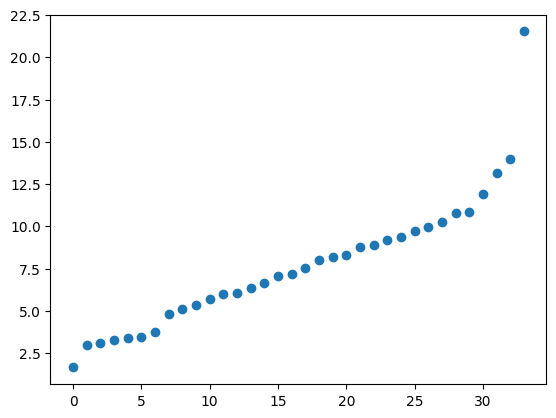

In [873]:
import matplotlib.pyplot as plt

plt.scatter([i for i in range(len(S))], np.log(S))

Now we want to sort the last vector in the Vt matrix in order to vizualise the variability of our features. The larger values indicate stronger variability. With this we must also sort the 3 before that. As seen in the graph above the last 4 dots are growing at a much faster rate than the rest of the dots. We want to visualize those 4 vectors but we also must keep the sorting consistent so we will store all the values in vectors at the same time to not lose order of our features.

In [874]:
sorted_feature_weights1 = sorted(Vt[cols-1], reverse=True)
sorted_feature_weights2 = []
sorted_feature_weights3 = []
sorted_feature_weights4 = []
sorted_features = []
for i, w in enumerate(sorted_feature_weights1):
    fInd = np.where(Vt[cols-1] == w)[0][0]
    print(f'{i+1}: {list(features.columns)[fInd]}, {w}')
    sorted_features.append(list(features.columns)[fInd])
    sorted_feature_weights2.append(Vt[cols-2][fInd])
    sorted_feature_weights3.append(Vt[cols-3][fInd])
    sorted_feature_weights4.append(Vt[cols-4][fInd])



1: yards, 0.9736348714320453
2: dropbacks, 0.14797675341032607
3: aimed_passes, 0.12160033610316287
4: completions, 0.08555131303500253
5: first_downs, 0.05021790328113198
6: def_gen_pressures, 0.04979298030384828
7: qb_rating, 0.024586800717166145
8: grades_offense, 0.020069424039324334
9: accuracy_percent, 0.019768600696347557
10: grades_pass, 0.019503720025692766
11: grades_run, 0.017993910644478545
12: completion_percent, 0.01703716344222788
13: grades_hands_fumble, 0.01598499846056104
14: sacks, 0.00884331192397932
15: scrambles, 0.007147602683264707
16: big_time_throws, 0.006606178892858616
17: touchdowns, 0.006455059194627307
18: drops, 0.006068845224694696
19: thrown_aways, 0.005818286524840871
20: turnover_worthy_plays, 0.005019104882233339
21: pressure_to_sack_rate, 0.004807589673501538
22: player_game_count, 0.0039608623059462405
23: interceptions, 0.002789288795920133
24: avg_depth_of_target, 0.0022700704404844266
25: bats, 0.0022662809650422916
26: ypa, 0.00193690595136102

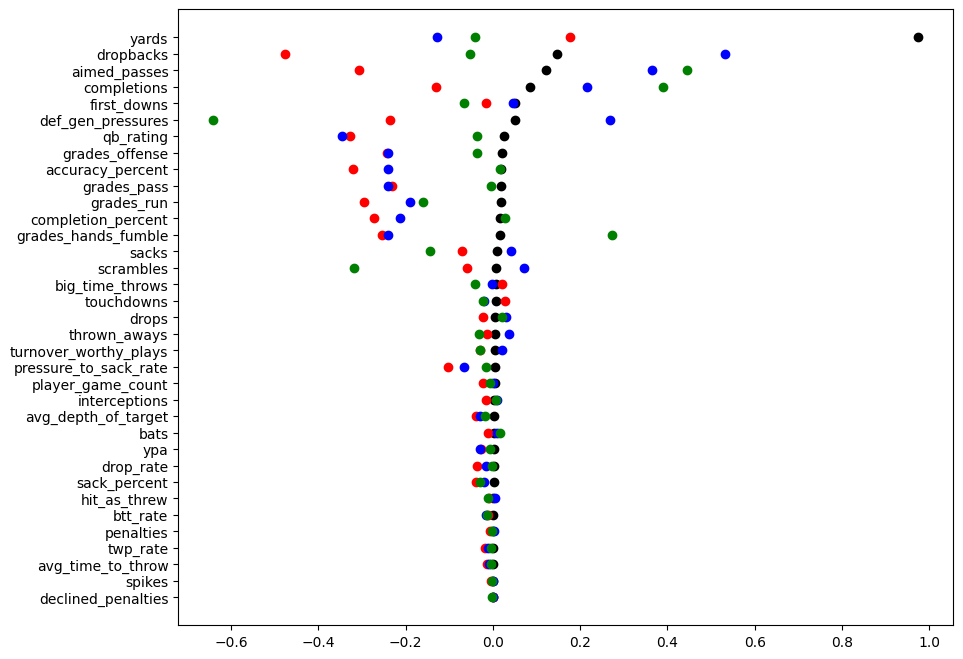

In [875]:
# scatter plot for all of the vectors
x = [i for i in range(35)]
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(sorted_feature_weights1[::-1], x, color='black')
ax.scatter(sorted_feature_weights2[::-1], x, color='red')
ax.scatter(sorted_feature_weights3[::-1], x, color='blue')
ax.scatter(sorted_feature_weights4[::-1], x, color='green')
ax.set_yticks(range(35))
ax.set_yticklabels(sorted_features[::-1])
plt.show()


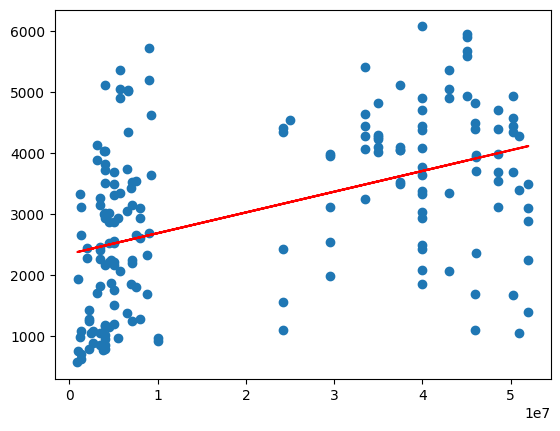

In [880]:
# yards and average salary relationship
plt.cla()
m, b = np.polyfit(passing_df["AAV"], passing_df['yards'], 1)
plt.scatter(passing_df["AAV"], passing_df['yards'])
plt.plot(passing_df['AAV'], m*passing_df['AAV'] + b, color='red')

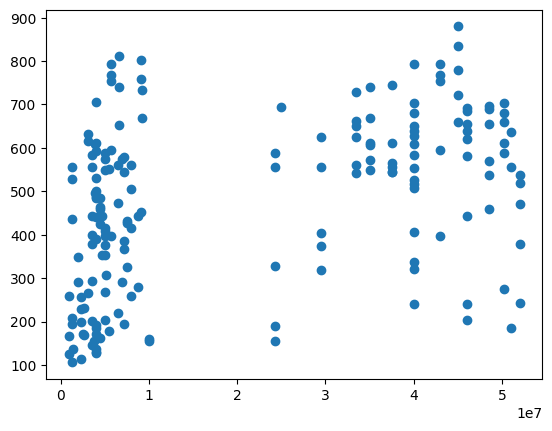

In [877]:
# dropbacks and average salary relationship
plt.cla()
plt.scatter(passing_df["AAV"], passing_df['dropbacks'])

In [892]:
# create one row per player with their average for each feature
grouped_qbs = passing_df.groupby('player')[numeric_cols].mean()
for q in grouped_qbs:
    # print(q)
    pass
grouped_qbs


player_id  player_game_count  accuracy_percent   
player                                                              
Aaron Rodgers         2241.0          15.500000         76.533333  \
Andy Dalton           6187.0          12.166667         73.333333   
Baker Mayfield       46518.0          14.800000         72.260000   
Blaine Gabbert        6162.0           5.500000         66.050000   
Brian Hoyer           5277.0           8.000000         68.800000   
Brock Purdy          77672.0          10.000000         77.400000   
C.J. Beathard        11859.0           6.000000         73.566667   
Case Keenum           7323.0          14.000000         74.800000   
Colt McCoy            5609.0           4.000000         75.800000   
Cooper Rush          12324.0           8.000000         69.400000   
Dak Prescott         10769.0          14.333333         75.900000   
Daniel Jones         39395.0          14.000000         75.425000   
David Blough         46508.0           5.000000         68.600000   
Davis Mills          52269.0          14.000000         72.250000   
Derek Carr            8671.0          16.000000         76.716667   
Deshaun Watson       11767.0          12.600000         73.740000   
Desmond Ridder       55086.0           4.000000         68.500000   
Drew Lock            39517.0           8.000000         70.300000   
Gardner Minshew      41401.0          11.500000         73.200000   
Geno Smith            7820.0          18.000000         77.700000   
Jacoby Brissett      10725.0          13.000000         74.100000   
Jalen Hurts          40291.0          14.666667         71.633333   
Jameis Winston        9434.0          10.000000         71.100000   
Jared Goff           10635.0          16.500000         75.483333   
Jimmy Garoppolo       8697.0          12.000000         75.900000   
Joe Burrow           28022.0          16.333333         76.866667   
Joe Flacco            4332.0           8.600000         73.400000   
Josh Allen           46601.0          17.000000         72.600000   
Justin Fields        82118.0          13.500000         69.300000   
Justin Herbert       28237.0          16.666667         77.233333   
Kenny Pickett        60515.0          13.000000         73.300000   
Kirk Cousins          7102.0          16.500000         77.850000   
Kyle Allen           26152.0          13.000000         73.300000   
Kyler Murray         38334.0          14.500000         76.025000   
Lamar Jackson        46416.0          14.000000         72.860000   
Mac Jones            60323.0          16.000000         74.650000   
Marcus Mariota        9435.0          13.000000         72.175000   
Mason Rudolph        46569.0          10.000000         74.500000   
Matthew Stafford      4924.0          14.333333         74.033333   
Mike White           46453.0           4.000000         73.000000   
Mitchell Trubisky    11757.0          11.800000         71.300000   
Nick Mullens         12282.0           9.000000         76.900000   
Patrick Mahomes      11765.0          18.600000         77.860000   
Russell Wilson        7077.0          16.166667         75.250000   
Ryan Tannehill        7014.0          14.400000         75.800000   
Sam Darnold          29048.0          11.200000         72.480000   
Sam Ehlinger         60555.0           4.000000         71.100000   
Skylar Thompson      60417.0           8.000000         64.400000   
Taylor Heinicke       9896.0          12.500000         72.150000   
Taysom Hill          12112.0          12.000000         77.900000   
Teddy Bridgewater     8667.0          12.000000         79.000000   
Trevor Lawrence      77632.0          18.000000         74.350000   
Tua Tagovailoa       60326.0          12.000000         74.566667   
Tyler Huntley        46448.0           6.000000         73.350000   
Tyrod Taylor          6332.0          11.000000         70.950000   
Zach Wilson          82096.0          11.000000         67.800000   

                

Now we want to see the relationship between a players average performance and their salary.

4.207504208017374e-05

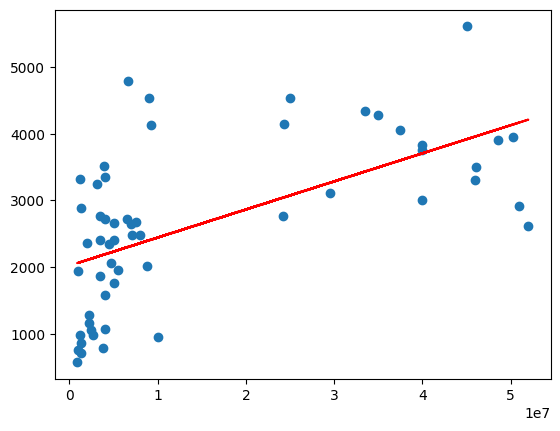

In [907]:

plt.cla()
m, b = np.polyfit(grouped_qbs['AAV'], grouped_qbs['yards'], 1)
plt.scatter(grouped_qbs['AAV'], grouped_qbs['yards'])
plt.plot(grouped_qbs['AAV'], grouped_qbs['AAV']*m + b, color='red')

As we can see there are clusters in our data between players that are paid highly and those that are not. We want to analyze what happense to each individually.

Greater than 20 million cluster.

-1.2257813088333326e-05

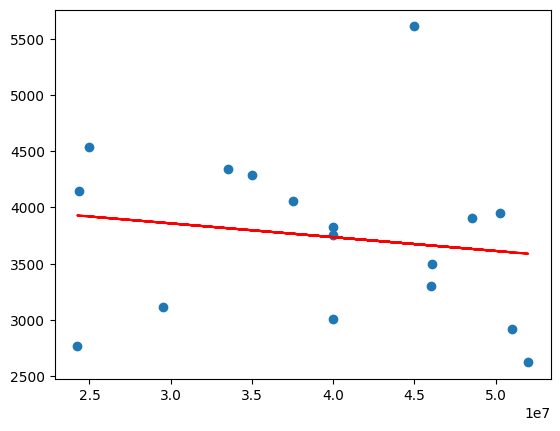

In [908]:

plt.cla()
m, b = np.polyfit(grouped_qbs[grouped_qbs['AAV'] > 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] > 20000000]['yards'], 1)
plt.scatter(grouped_qbs[grouped_qbs['AAV'] > 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] > 20000000]['yards'])
plt.plot(grouped_qbs[grouped_qbs['AAV'] > 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] > 20000000]['AAV']*m + b, color='red')

Less than 20 million cluster

0.0001895094375761075

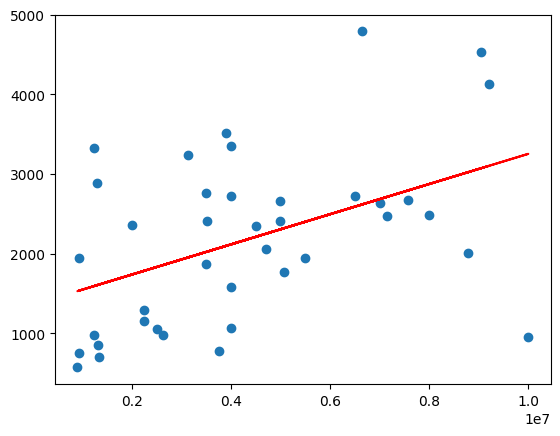

In [909]:
plt.cla()
m, b = np.polyfit(grouped_qbs[grouped_qbs['AAV'] < 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] < 20000000]['yards'], 1)
plt.scatter(grouped_qbs[grouped_qbs['AAV'] < 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] < 20000000]['yards'])
plt.plot(grouped_qbs[grouped_qbs['AAV'] < 20000000]['AAV'], grouped_qbs[grouped_qbs['AAV'] < 20000000]['AAV']*m + b, color='red')

In [910]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('yards ~ AAV', data=grouped_qbs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yards   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     28.71
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.78e-06
Time:                        00:31:58   Log-Likelihood:                -465.22
No. Observations:                  56   AIC:                             934.4
Df Residuals:                      54   BIC:                             938.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2022.0954    177.643     11.383      0.000    1665.942    2378.249
AAV         4.208e-05   7.85e-06      5.358      0.000    2.63e-05    5.78e-05
==============================================================================
Omnibus:                        1.729   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.705
Skew:                           0.362   Prob(JB):                        0.426
Kurtosis:                       2.544   Cond. No.                     3.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There appears to be high correlation between salary and yards for players who are paid less. However, for players that are paid high, there is slight negative correlation, which means that it is both not strong and not a good predictor for future salary.